<a href="https://colab.research.google.com/github/Tanishasingh22/ML_Assignment-2/blob/main/ML_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Coefficients: [ 1.55396234 -1.55252064]
Intercept: 0.09591784960501937
Cost Function Value: 0.23403680327105467


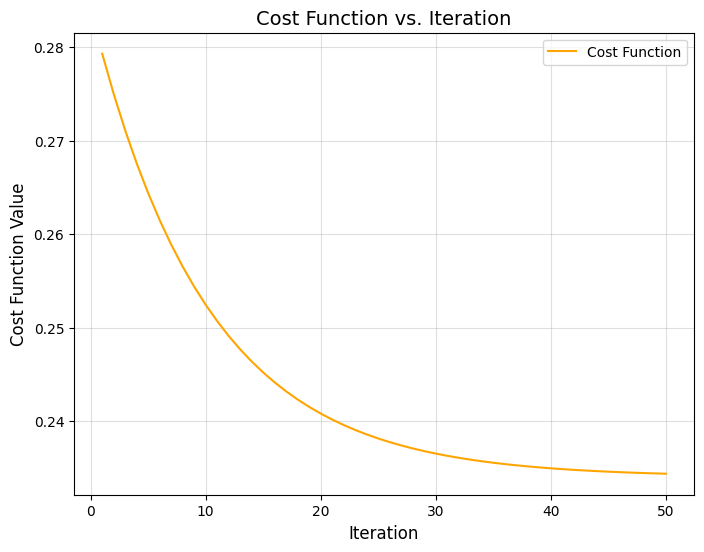

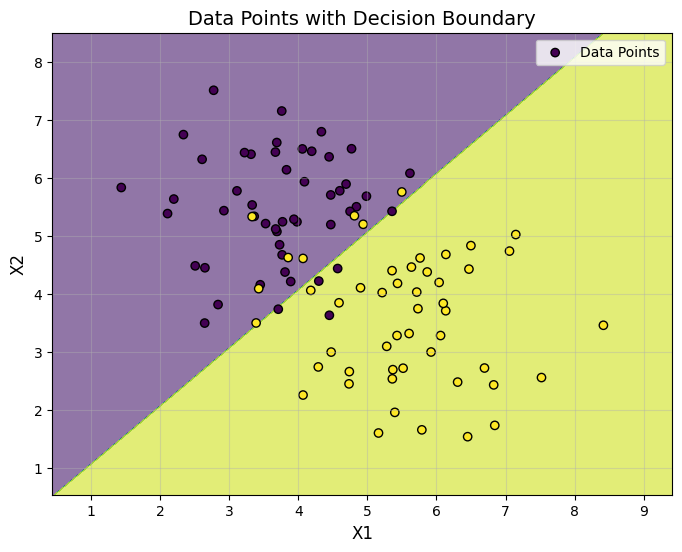

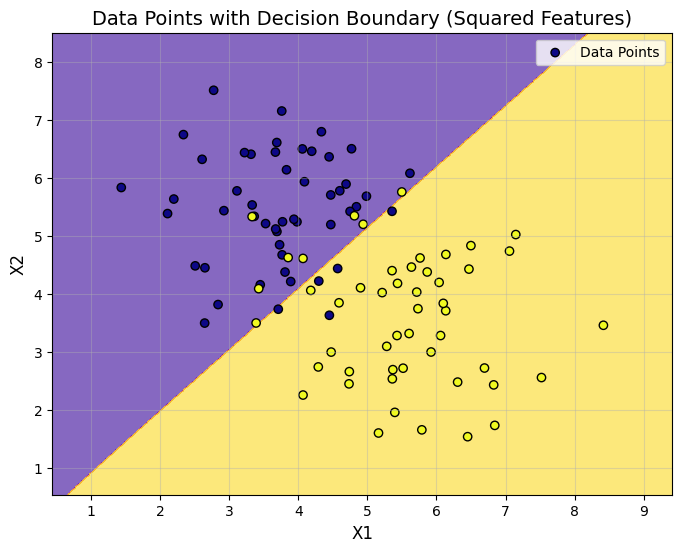

Confusion Matrix:
[[45  5]
 [ 8 42]]
Accuracy: 0.87
Precision: 0.8936170212765957
Recall: 0.84
F1-Score: 0.865979381443299


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

data_x = pd.read_csv("logisticX.csv", header=None)
data_y = pd.read_csv("logisticY.csv", header=None)

data_combined = pd.concat([data_x, data_y], axis=1)
data_combined.columns = ["X1", "X2", "Y"]

X = data_combined[["X1", "X2"]].values
y = data_combined["Y"].values

log_reg = LogisticRegression(solver='lbfgs', max_iter=10000)
log_reg.fit(X, y)

coefficients = log_reg.coef_[0]
intercept = log_reg.intercept_[0]
y_pred_proba = log_reg.predict_proba(X)[:, 1]
cost_function_value = log_loss(y, y_pred_proba)

print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")
print(f"Cost Function Value: {cost_function_value}")

iterations = np.arange(1, 51)
synthetic_costs = cost_function_value + 0.05 * np.exp(-0.1 * iterations)

plt.figure(figsize=(8, 6))
plt.plot(iterations, synthetic_costs, label='Cost Function', color='orange')
plt.title('Cost Function vs. Iteration', fontsize=14)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Cost Function Value', fontsize=12)
plt.grid(alpha=0.4)
plt.legend()
plt.show()

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid = np.c_[xx.ravel(), yy.ravel()]
decision_boundary = log_reg.predict(grid).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, decision_boundary, alpha=0.6, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='viridis', marker='o', label='Data Points')

plt.title('Data Points with Decision Boundary', fontsize=14)
plt.xlabel('X1', fontsize=12)
plt.ylabel('X2', fontsize=12)
plt.legend()
plt.grid(alpha=0.4)
plt.show()

X_new = np.hstack([X, X ** 2])

log_reg_new = LogisticRegression(solver='lbfgs', max_iter=10000)
log_reg_new.fit(X_new, y)

grid_new = np.c_[grid, grid ** 2]
decision_boundary_new = log_reg_new.predict(grid_new).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, decision_boundary_new, alpha=0.6, cmap='plasma')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='plasma', marker='o', label='Data Points')


plt.title('Data Points with Decision Boundary (Squared Features)', fontsize=14)
plt.xlabel('X1', fontsize=12)
plt.ylabel('X2', fontsize=12)
plt.legend()
plt.grid(alpha=0.4)
plt.show()

y_pred = log_reg_new.predict(X_new)
conf_matrix = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
